In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-01-21 14:04:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   169MB/s    in 0.4s    

2025-01-21 14:04:17 (169 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
IMG_SIZE = (150, 150)  # Tamaño de las imágenes
BATCH_SIZE = 32
EPOCHS = 10

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,  # Redimensionar todas las imágenes al mismo tamaño
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,  # Redimensionar todas las imágenes al mismo tamaño
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5211 - loss: 1.1609 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5349 - loss: 0.6876 - val_accuracy: 0.6130 - val_loss: 0.6355
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6397 - loss: 0.6298 - val_accuracy: 0.6250 - val_loss: 0.6415
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.6676 - loss: 0.6297 - val_accuracy: 0.5850 - val_loss: 0.6385
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6427 - loss: 0.6109 - val_accuracy: 0.6620 - val_loss: 0.6123
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7134 - loss: 0.5662 - val_accuracy: 0.6720 - val_loss: 0.5927
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7305 - loss: 0.5569 - val_accuracy: 0.6660 - val_loss: 0.6289
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7186 - loss: 0.5415 - val_accuracy: 0.6730 - val_loss: 0.

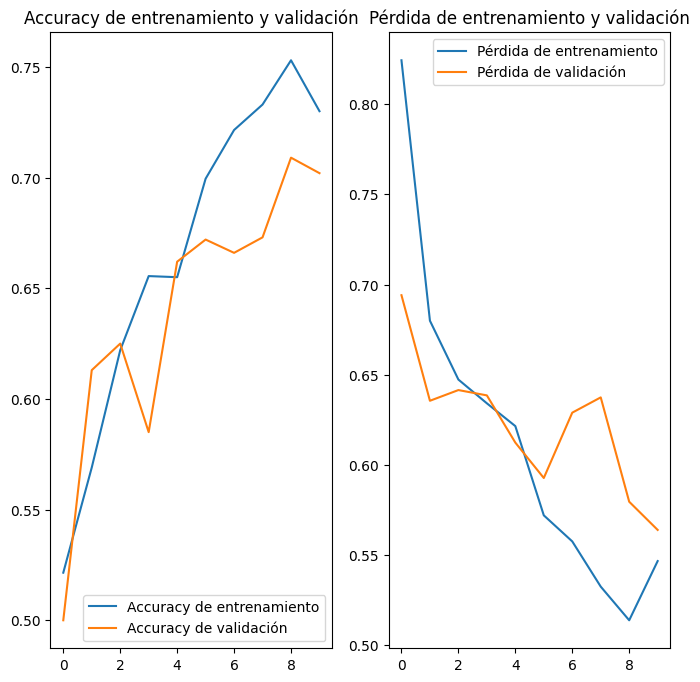

In [12]:
# Evaluación del modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Accuracy de entrenamiento')
plt.plot(range(EPOCHS), val_acc, label='Accuracy de validación')
plt.legend(loc='lower right')
plt.title('Accuracy de entrenamiento y validación')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Pérdida de entrenamiento')
plt.plot(range(EPOCHS), val_loss, label='Pérdida de validación')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y validación')
plt.show()


In [15]:
model.save("model_perros_vs_gatos.h5")
files.download("model_perros_vs_gatos.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)